In [1]:
# Dragon Real Estate Price Predictor

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
housing = pd.read_csv("/content/drive/MyDrive/CSV/estate_1.csv")
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.98765,0.0,12.50,0,0.561,6.980,89.0,2.0980,3,320,23.0,396.00,12.00,12.0
507,0.23456,0.0,12.50,0,0.561,6.980,76.0,2.6540,3,320,23.0,343.00,25.00,32.0
508,0.44433,0.0,12.50,0,0.561,6.123,98.0,2.9870,3,320,23.0,343.00,21.00,54.0
509,0.77763,0.0,12.70,0,0.561,6.222,34.0,2.5430,3,329,23.0,343.00,76.00,67.0


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [5]:
housing['CHAS'].value_counts()    #counts the number of same values is a column

0    476
1     35
Name: CHAS, dtype: int64

In [6]:
housing['RM'].value_counts()      #another example of value_counts()

6.980    4
6.229    3
6.417    3
6.405    3
6.167    3
        ..
6.232    1
6.593    1
6.425    1
5.950    1
6.625    1
Name: RM, Length: 444, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,506.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.287589,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.703802,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.885500,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.209000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.629750,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


In [8]:
# std means standard deviation that means the distance between the value and the mean
# percent means lets say for the CRIM column 25% of values is less than 0.082325, 50% of values are les than 0.261690 and similarly for 75%

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f664619ef90>,
      dtype=object)

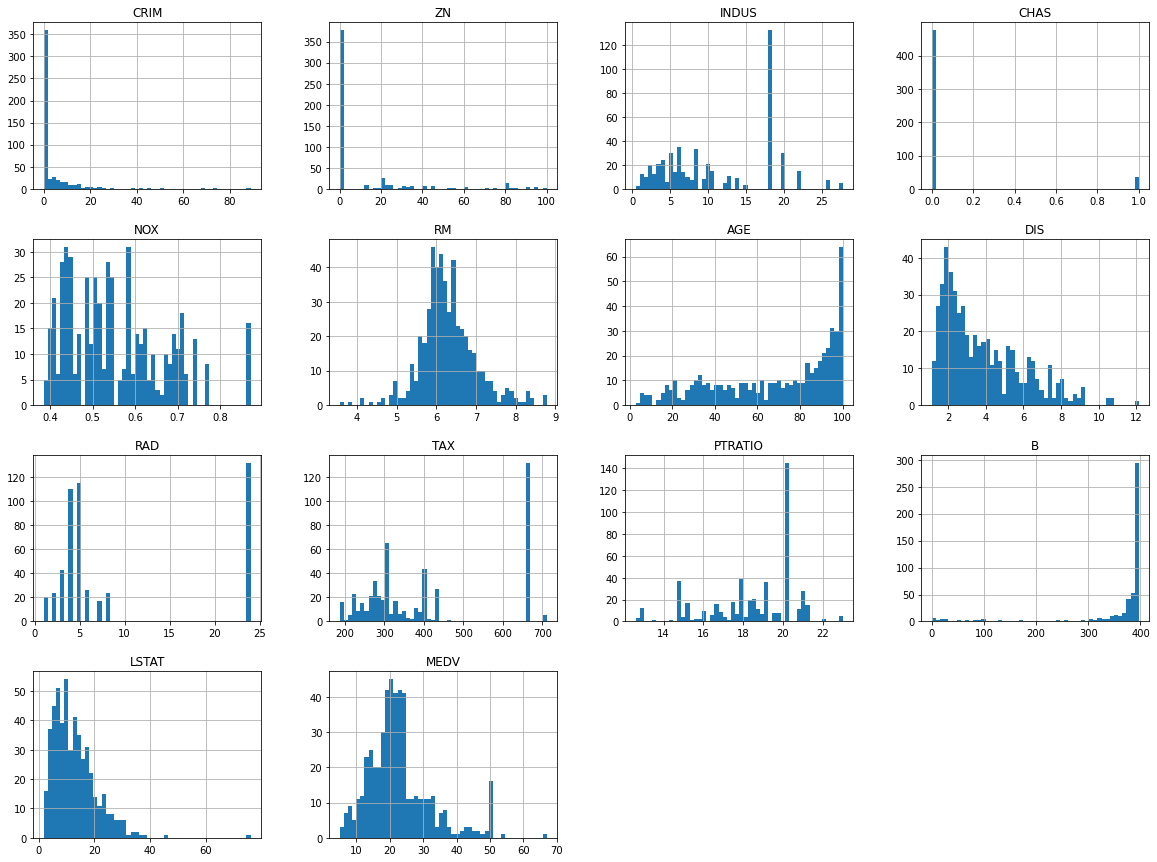

In [9]:
# For plotting histogram
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

In [10]:
# Train-Test Splitting

In [11]:
# For learning purpose
import numpy as np
# def split_train_test(data, test_ratio):
#   np.random.seed(10)
#   shuffled = np.random.permutation(len(data))
#   print(shuffled)
#   test_set_size = int(len(data) * test_ratio)
#   test_indices = shuffled[:test_set_size]
#   train_indices = shuffled[test_set_size:]
#   return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
# train_set, test_set = split_train_test(housing, 0.2)

In [13]:
# print("Rows in trainset: ", len(train_set),"\nRows in test set: ", len(test_set))

In [14]:
# from sklearn.model_selection import train_test_split

# train_set, test_set = train_test_split(housing, test_size=0.2, random_state=10)
# print("Rows in trainset: ", len(train_set),"\nRows in test set: ", len(test_set))

In [15]:
# If we have a very special feature to include and the values should be equally distributed fot the test and train sets respectively
# then instead of train_test_split we can use StratifiedShuffleSplit

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
strat = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=10)
for train_index, test_index in strat.split(housing, housing['CHAS'], housing['RM']):
  split_train_set = housing.loc[train_index]
  split_test_set = housing.loc[test_index]

In [17]:
split_test_set['CHAS'].value_counts()

0    96
1     7
Name: CHAS, dtype: int64

In [18]:
split_train_set['CHAS'].value_counts()

0    380
1     28
Name: CHAS, dtype: int64

In [19]:
#  as you can see above the ratio of 0 and 1 of test data and train data is almost equal
# hence StratifiedShuffleSplit is used

In [20]:
housing = split_train_set.copy()

In [21]:
# Looking for Corelations

In [22]:
corr_matrix = housing.corr()      #it gives the corelation of the specific value to other values... directly proportional or not

In [23]:
corr_matrix['MEDV'].sort_values(ascending=False)       #corelation of MEDV i.e. price to other datas

MEDV       1.000000
RM         0.635966
ZN         0.320588
B          0.316704
DIS        0.204612
CHAS       0.181149
AGE       -0.329168
RAD       -0.368348
NOX       -0.377254
CRIM      -0.385402
INDUS     -0.422336
PTRATIO   -0.429638
TAX       -0.438182
LSTAT     -0.511943
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6636bdb110>,
      dtype=object)

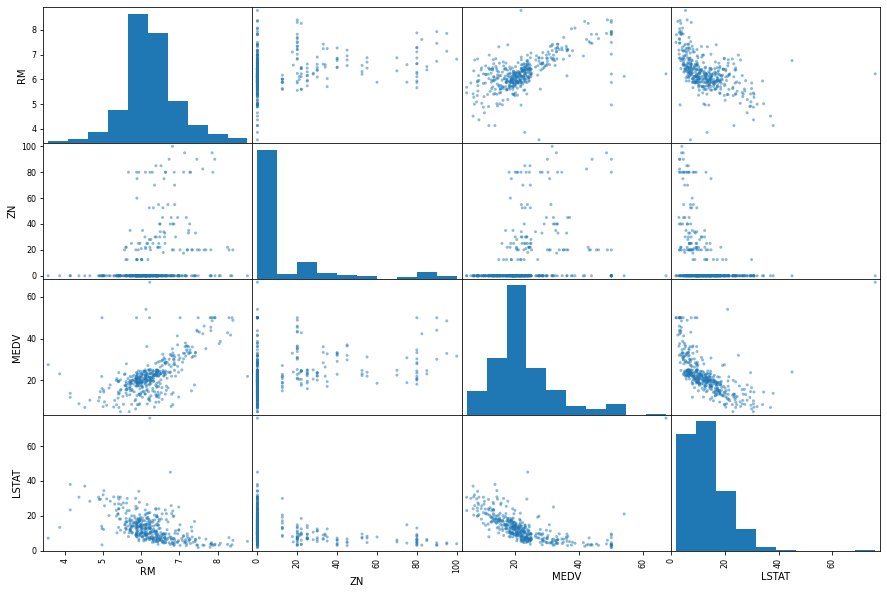

In [24]:
from pandas.plotting import scatter_matrix
attributes = ["RM", "ZN", "MEDV", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (15,10))

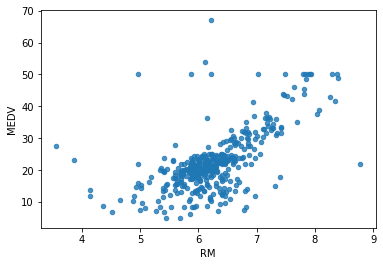

In [25]:
housing.plot(kind='scatter', x='RM', y='MEDV', alpha=0.8)

In [26]:
# Trying out Attribute Combinations

In [27]:
# housing['TAXRM'] = housing['TAX']/housing['RM']

In [28]:
# housing.head()

In [29]:
corr_matrix = housing.corr() 
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.635966
ZN         0.320588
B          0.316704
DIS        0.204612
CHAS       0.181149
AGE       -0.329168
RAD       -0.368348
NOX       -0.377254
CRIM      -0.385402
INDUS     -0.422336
PTRATIO   -0.429638
TAX       -0.438182
LSTAT     -0.511943
Name: MEDV, dtype: float64

In [30]:
# housing.plot(kind='scatter', x='TAXRM', y='MEDV', alpha=1)

In [31]:
housing = split_train_set.drop("MEDV", axis=1)
housing_labels = split_train_set["MEDV"].copy()

In [32]:
# what if few values get missing from the column then what to do????

In [33]:
# Missing Attributes

In [34]:
# 3 ways to get rid of the missing values/attributes
# 1. delete the particular row
# 2. delete the particaluar whole column i.e. if few values are missing from RM then delete the whole RM column
# 3. set the median/mean value of column for that value 

In [35]:
# a = housing.dropna(subset=["RM"])    #option 1
# note that the original dataframe will remain unchanged

In [36]:
# housing.drop("RM", axis=1)     #option 2.... the RM column wil be removed
# note that the original dataframe will remain unchanged

In [37]:
# median = housing["RM"].median()     #find median for option 3

In [38]:
# housing["RM"].fillna(median)      #option 3
# note that the original dataframe will remain unchanged

In [39]:
# the better way to deal with missing attributes and not just for a particular columns but for every columns

In [40]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [41]:
# imputer.statistics_

In [42]:
X = imputer.transform(housing)

In [43]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [44]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,3.607630,10.824755,11.319632,0.068627,0.556803,6.255522,68.961765,3.799301,9.546569,410.144608,18.519118,356.139118,13.033333
std,8.214020,22.425756,6.792844,0.253130,0.116858,0.695686,27.486112,2.112819,8.737661,168.569880,2.237304,90.544368,7.866768
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,187.000000,12.600000,2.520000,1.730000
25%,0.085947,0.000000,5.190000,0.000000,0.449000,5.886500,45.750000,2.095550,4.000000,281.000000,17.400000,374.237500,7.320000
50%,0.266005,0.000000,9.900000,0.000000,0.538000,6.193000,77.500000,3.175750,5.000000,330.000000,19.100000,391.305000,11.575000
75%,3.674807,12.500000,18.100000,0.000000,0.631000,6.565500,94.300000,5.212575,24.000000,666.000000,20.200000,396.242500,16.945000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000


In [45]:
# Scikit-Learn Design

In [46]:
#  Primarily, 3 types of objects:
# 1. Estimators:-
#     It estimates some parameter based on a dataset. Eg, imputer. It has a fit method and transform method.
#     Fit method fits the datasets and calculates internal parameters.

# 2. Transformers:-
#     It takes input and returns output based on the learning from fit(). It also has a convinience function called fit_transform()
#     which fits and then transforms.

# 3. Predictors:-
#     LinearRegression model is an example of predictor. fit() and predict() are 2 common functions. It also gives score function
#     which will evaluate the predictions.

In [47]:
# Feature Scaling

In [48]:
# Primarialy, there are 2 types feature scaling methods:
# 1. Min-max scaling (Normalization):- 
#       (value-min)/(max-min)
#        for this sklearn provides class called MinMaxScaler

# 2. Standardization:-
#       (value-mean)/std      .....(where std is Standard DEviation)
#         For this sklearn provides class called StandardScaler

In [49]:
# Creating Pipeline

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy='median')),
                        # ....can add as many as you want in your pipeline
                        ('std_scaler', StandardScaler())
])

In [51]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [52]:
housing_num_tr.shape

(408, 13)

In [53]:
# Selecting a desired model for Dragon Real Estates

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [55]:
some_data = housing.iloc[:5]

In [56]:
some_labels = housing_labels.iloc[:5]

In [57]:
prepared_data = my_pipeline.transform(some_data)

In [58]:
model.predict(prepared_data)

array([17.791, 22.122, 23.365, 19.556, 19.749])

In [59]:
list(some_labels)

[17.6, 22.0, 23.3, 19.3, 19.3]

In [60]:
# Evaluating the model

In [61]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [62]:
rmse

1.612199741006666

In [63]:
# Using better evaluation technique- Cross Validation

In [64]:
from sklearn.model_selection import  cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [65]:
rmse_scores

array([ 3.81314501,  2.57517159,  3.1009875 ,  2.98330823,  2.43185867,
        3.96602345, 10.17050993,  4.6327228 ,  2.58429611,  4.18049314])

In [66]:
def print_scores(scores):
  print('Scores: ', scores)
  print('Mean: ', scores.mean())
  print('Standard Deviation: ', scores.std())

In [67]:
print_scores(rmse_scores)

Scores:  [ 3.81314501  2.57517159  3.1009875   2.98330823  2.43185867  3.96602345
 10.17050993  4.6327228   2.58429611  4.18049314]
Mean:  4.043851644484833
Standard Deviation:  2.164722950226833


In [68]:
# Saving the model

In [69]:
from joblib import dump,load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

In [70]:
# Testing the model on test data

In [71]:
X_test = split_test_set.drop("MEDV", axis=1)
Y_test = split_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))       #here we can compare the data values and the predicted values

[18.633 20.364 15.152 22.89  20.725 29.334 13.09   8.712 15.311 20.832
 30.748 14.766 31.555 33.936 43.874 20.123 23.258 43.075 29.165 34.118
 42.582 14.534 32.104 20.586 16.804 14.366 26.004 22.048 21.042 19.669
 15.858 14.686 21.117 41.206 16.286 42.359 32.396 16.797 25.986 17.85
 21.21  20.126 23.011 21.16  14.812 13.516 35.795 27.655 25.98  27.898
 19.317 24.219  8.848 27.655 13.179 10.03  21.571 21.733 30.053 20.249
 27.045 14.635 28.862 13.608 17.425 32.203 16.136 20.226 18.678 19.673
 21.138 12.441 32.802 26.001 17.047 13.624 11.704 32.159 14.514 36.065
 41.719 20.713 30.363 17.955 20.943 25.859 18.809 23.88  42.053 23.794
 23.013 29.017 48.208 14.404 15.903 20.368 26.041 15.062 23.541 21.67
 29.611 34.529 11.293] [16.8, 19.7, 13.8, 23.6, 21.2, 30.5, 17.9, 7.2, 19.1, 16.1, 26.6, 13.6, 33.1, 34.9, 50.0, 21.1, 24.6, 44.8, 28.2, 35.4, 39.8, 14.1, 34.9, 19.9, 13.1, 12.7, 26.2, 23.0, 26.4, 20.4, 13.3, 11.7, 23.1, 46.7, 16.7, 50.0, 29.6, 10.4, 28.0, 16.6, 24.7, 20.3, 24.1, 22.2, 14.9,

In [72]:
final_rmse

2.7894196146165897

In [73]:
# model usage

In [74]:
prepared_data

array([[-0.4146236 ,  0.4989337 , -0.80471964, -0.27144836, -1.07786549,
        -0.95349822,  0.27459287,  1.96926474, -0.29180523, -0.4760222 ,
         0.2599537 ,  0.18080591, -0.06787897],
       [-0.4349504 , -0.48328559, -1.16583611, -0.27144836, -0.58092896,
         0.21512786,  0.17988351, -0.33513029, -0.86474331, -0.83239467,
        -0.3218161 ,  0.41368463, -0.61515318],
       [-0.42091691,  0.63287269, -0.91231761, -0.27144836, -0.88937232,
        -0.15906276, -1.448389  ,  1.90287382, -0.17721761, -0.74924109,
         0.52846284,  0.38194855, -0.78569909],
       [-0.41884839, -0.48328559, -0.64995545, -0.27144836, -0.93221168,
        -0.82540989, -1.28082628,  0.61656761, -0.75015569, -1.05215769,
        -0.27706458,  0.45072849, -0.35933431],
       [-0.42209805, -0.48328559, -0.19303257, -0.27144836, -0.08399244,
        -0.75488935, -0.13702859, -0.49288571, -0.40639284,  0.129811  ,
        -0.3218161 ,  0.391016  ,  0.07339414]])

In [75]:
features = np.array([[-0.39045075, -0.49703249, -0.11264302, -0.27144836, -0.01847545,
        -0.09455252,  0.5829419 , -0.7583632 , -0.41238419,  0.15070654,
        -0.30803868,  0.34998552, -0.26596749]])      #here are the features 
model.predict(features)                               #here we can see the model predicted the price(value) of the house from the given features

array([20.707])